In [1]:
# lOading libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train = pd.read_csv("C:\\Users\\hp\\Downloads\\trainData.csv")
test = pd.read_csv("C:\\Users\\hp\\Downloads\\testData.csv")

In [ ]:
train.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Description                   1261 non-null   object 
 1   Vendor_Name                   8753 non-null   object 
 2   Created                       8753 non-null   object 
 3   Invoice_Date                  8753 non-null   object 
 4   Due_Date                      8753 non-null   object 
 5   Amount                        8753 non-null   float64
 6   Settled                       8753 non-null   float64
 7   Outstanding                   8753 non-null   float64
 8   Number_of_Days_until_Payment  8753 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 615.6+ KB


In [ ]:
train.isnull().sum()

Description                     7492
Vendor_Name                        0
Created                            0
Invoice_Date                       0
Due_Date                           0
Amount                             0
Settled                            0
Outstanding                        0
Number_of_Days_until_Payment       0
dtype: int64

In [ ]:
train = train.drop(columns = ["Description"])
test = test.drop(columns = ["Description"])

In [ ]:
train.head()

,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2


In [ ]:
train['Invoice_Date']=pd.to_datetime(train['Invoice_Date'], utc=False)
train['Due_Date']=pd.to_datetime(train['Due_Date'], utc=False)
train['Created']=pd.to_datetime(train['Created'], utc=False)


test['Invoice_Date']=pd.to_datetime(test['Invoice_Date'], utc=False)
test['Due_Date']=pd.to_datetime(test['Due_Date'], utc=False)
test['Created']=pd.to_datetime(test['Created'], utc=False)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Vendor_Name                   8753 non-null   object        
 1   Created                       8753 non-null   datetime64[ns]
 2   Invoice_Date                  8753 non-null   datetime64[ns]
 3   Due_Date                      8753 non-null   datetime64[ns]
 4   Amount                        8753 non-null   float64       
 5   Settled                       8753 non-null   float64       
 6   Outstanding                   8753 non-null   float64       
 7   Number_of_Days_until_Payment  8753 non-null   int64         
dtypes: datetime64[ns](3), float64(3), int64(1), object(1)
memory usage: 547.2+ KB


In [ ]:
train['Vendor_Name'].nunique()

3276

In [ ]:
def processName(df,name):
  id = []
  for str in name:
    id.append(name_dict[str])
  df['ID']=id
  return df


Names = train["Vendor_Name"].unique()
name_dict = {}
cnt=0
for str in Names:
  name_dict.update({str:cnt})
  cnt+=1

    
train = processName(train,train['Vendor_Name'])
test_names = test['Vendor_Name'] 
test = processName(test,test['Vendor_Name'])

train = train.drop(columns=['Vendor_Name'])
test = test.drop(columns=['Vendor_Name'])
train

In [ ]:
# invoice date 

train['Invoice_day'] = train['Invoice_Date'].dt.day
train['Invoice_year'] = train['Invoice_Date'].dt.year
train['Invoice_month'] = train['Invoice_Date'].dt.month
# train['Invoice_weekday'] = train['Invoice_Date'].dt.weekday

test['Invoice_day'] = test['Invoice_Date'].dt.day
test['Invoice_year'] = test['Invoice_Date'].dt.year
test['Invoice_month'] = test['Invoice_Date'].dt.month
# test['Invoice_weekday'] = test['Invoice_Date'].dt.weekday

train.head()

,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month
0,2011-04-26 11:50:00,2011-04-26,2011-05-26,672.78,672.78,0.0,13,0,26,2011,4
1,2011-05-24 09:40:00,2011-05-24,2011-06-23,5101.98,5101.98,0.0,38,1,24,2011,5
2,2011-05-24 12:56:00,2011-03-24,2011-04-23,7422.78,7422.78,0.0,61,2,24,2011,3
3,2011-09-07 10:42:00,2011-05-10,2011-05-24,11.98,11.98,0.0,62,3,10,2011,5
4,2011-05-09 20:55:00,2011-09-05,2011-09-06,5501.98,5501.98,0.0,2,4,5,2011,9


In [ ]:
# due date 

train['Due_day'] = train['Due_Date'].dt.day
# train['Due_year'] = train['Due_Date'].dt.year
# train['Due_month'] = train['Due_Date'].dt.month
train['Due_weekday'] = train['Due_Date'].dt.weekday


test['Due_day'] = test['Due_Date'].dt.day
# test['Due_year'] = test['Due_Date'].dt.year
# test['Due_month'] = test['Due_Date'].dt.month
test['Due_weekday'] = test['Due_Date'].dt.weekday

train.head()

,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday
0,2011-04-26 11:50:00,2011-04-26,2011-05-26,672.78,672.78,0.0,13,0,26,2011,4,26,3
1,2011-05-24 09:40:00,2011-05-24,2011-06-23,5101.98,5101.98,0.0,38,1,24,2011,5,23,3
2,2011-05-24 12:56:00,2011-03-24,2011-04-23,7422.78,7422.78,0.0,61,2,24,2011,3,23,5
3,2011-09-07 10:42:00,2011-05-10,2011-05-24,11.98,11.98,0.0,62,3,10,2011,5,24,1
4,2011-05-09 20:55:00,2011-09-05,2011-09-06,5501.98,5501.98,0.0,2,4,5,2011,9,6,1


In [ ]:
# created date 

def func(hour):
    if hour<=8:
        return 1
    elif hour<=16:
        return 3
    return 2


train['Created_day'] = train['Created'].dt.day
# train['Created_year'] = train['Created'].dt.year
# train['Created_month'] = train['Created'].dt.month
# train['Created_weekday'] = train['Created'].dt.weekday
Created_hour = train['Created'].dt.hour
train['Created_Batch'] = Created_hour.apply(func)


test['Created_day'] = test['Created'].dt.day
# test['Created_year'] = test['Created'].dt.year
# test['Created_month'] = test['Created'].dt.month
# test['Created_weekday'] = test['Created'].dt.weekday
Created_hour = test['Created'].dt.hour
test['Created_Batch'] = Created_hour.apply(func)

train.head()

,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch
0,2011-04-26 11:50:00,2011-04-26,2011-05-26,672.78,672.78,0.0,13,0,26,2011,4,26,3,26,3
1,2011-05-24 09:40:00,2011-05-24,2011-06-23,5101.98,5101.98,0.0,38,1,24,2011,5,23,3,24,3
2,2011-05-24 12:56:00,2011-03-24,2011-04-23,7422.78,7422.78,0.0,61,2,24,2011,3,23,5,24,3
3,2011-09-07 10:42:00,2011-05-10,2011-05-24,11.98,11.98,0.0,62,3,10,2011,5,24,1,7,3
4,2011-05-09 20:55:00,2011-09-05,2011-09-06,5501.98,5501.98,0.0,2,4,5,2011,9,6,1,9,2


In [ ]:
temp = train['Number_of_Days_until_Payment'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
train['Cleared_Date'] = train['Invoice_Date'] + temp
train['Late'] = (train['Cleared_Date']>train['Due_Date']).astype(int)
train = train.drop(columns=['Cleared_Date', 'Invoice_Date', 'Due_Date', 'Created'])

test = test.drop(columns=['Invoice_Date', 'Due_Date', 'Created'])
train.head()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,672.78,672.78,0.0,13,0,26,2011,4,26,3,26,3,0
1,5101.98,5101.98,0.0,38,1,24,2011,5,23,3,24,3,1
2,7422.78,7422.78,0.0,61,2,24,2011,3,23,5,24,3,1
3,11.98,11.98,0.0,62,3,10,2011,5,24,1,7,3,1
4,5501.98,5501.98,0.0,2,4,5,2011,9,6,1,9,2,1


In [ ]:
# labels
train_labels = train['Number_of_Days_until_Payment']
train.head()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,672.78,672.78,0.0,13,0,26,2011,4,26,3,26,3,0
1,5101.98,5101.98,0.0,38,1,24,2011,5,23,3,24,3,1
2,7422.78,7422.78,0.0,61,2,24,2011,3,23,5,24,3,1
3,11.98,11.98,0.0,62,3,10,2011,5,24,1,7,3,1
4,5501.98,5501.98,0.0,2,4,5,2011,9,6,1,9,2,1


In [ ]:
number_of_times_late = train.groupby('ID')["Late"].sum()
total_number_of_times_id_occur = train.groupby('ID')["Late"].count()

History = []
for i in range(len(train)):
    x = number_of_times_late[train.loc[i,'ID']]/ total_number_of_times_id_occur[train.loc[i,'ID']]
    if x>=0.75:
        History.append(2)
    elif x>=0.50:
        History.append(1)
    else:
        History.append(0)

train["Late"] = History
train.head()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,672.78,672.78,0.0,13,0,26,2011,4,26,3,26,3,0
1,5101.98,5101.98,0.0,38,1,24,2011,5,23,3,24,3,2
2,7422.78,7422.78,0.0,61,2,24,2011,3,23,5,24,3,2
3,11.98,11.98,0.0,62,3,10,2011,5,24,1,7,3,2
4,5501.98,5501.98,0.0,2,4,5,2011,9,6,1,9,2,1


In [ ]:
History = []
for i in range(len(test)):
    x = number_of_times_late[test.loc[i,'ID']]/ total_number_of_times_id_occur[test.loc[i,'ID']]
    if x>=0.75:
        History.append(2)
    elif x>=0.50:
        History.append(1)
    else:
        History.append(0)


test["Late"] = History
test.head()

,Amount,Settled,Outstanding,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,11.98,11.98,0.0,1965,30,2015,11,30,2,26,3,0
1,56.98,56.98,0.0,1580,6,2016,9,6,3,27,3,2
2,61.98,61.98,0.0,1889,29,2016,2,14,0,29,1,0
3,674.30,674.30,0.0,150,23,2013,8,6,4,27,2,0
4,302.94,302.94,0.0,2760,10,2017,5,9,4,16,3,1


In [ ]:
train.head()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,672.78,672.78,0.0,13,0,26,2011,4,26,3,26,3,0
1,5101.98,5101.98,0.0,38,1,24,2011,5,23,3,24,3,2
2,7422.78,7422.78,0.0,61,2,24,2011,3,23,5,24,3,2
3,11.98,11.98,0.0,62,3,10,2011,5,24,1,7,3,2
4,5501.98,5501.98,0.0,2,4,5,2011,9,6,1,9,2,1


In [ ]:
test.head()

,Amount,Settled,Outstanding,ID,Invoice_day,Invoice_year,Invoice_month,Due_day,Due_weekday,Created_day,Created_Batch,Late
0,11.98,11.98,0.0,1965,30,2015,11,30,2,26,3,0
1,56.98,56.98,0.0,1580,6,2016,9,6,3,27,3,2
2,61.98,61.98,0.0,1889,29,2016,2,14,0,29,1,0
3,674.30,674.30,0.0,150,23,2013,8,6,4,27,2,0
4,302.94,302.94,0.0,2760,10,2017,5,9,4,16,3,1


<AxesSubplot:>

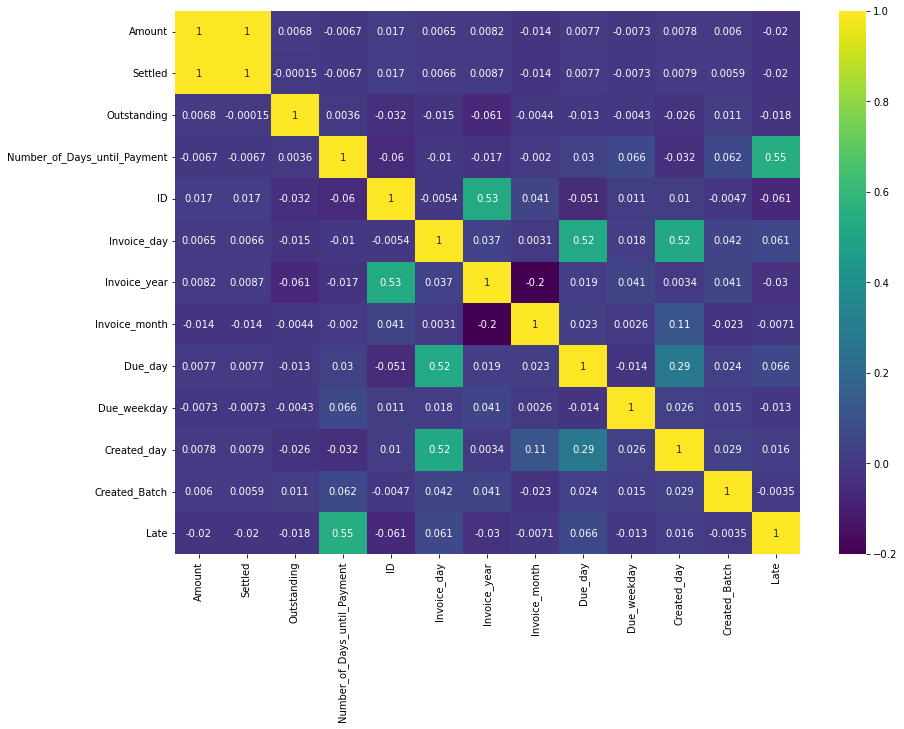

In [ ]:
plt.figure(figsize=(14,10))
cor = train.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

In [ ]:
train = train.drop(columns=['Number_of_Days_until_Payment', 'Amount', 'Settled','Outstanding'])
test = test.drop(columns=['Amount', 'Settled','Outstanding'])

# model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train , train_labels, test_size=0.20, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
# standarisation
X_train_std = StandardScaler().fit_transform(x_train)
X_test_std = StandardScaler().fit_transform(x_test)
df_test_std = StandardScaler().fit_transform(test)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
def printmse(y_test,pred):
  mse = sqrt(mean_squared_error(y_test,pred))
  print(mse)

# XGB MODEL

In [ ]:
params = {  'max_depth': [3, 5, 6, 10],
           'learning_rate': [0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [50, 70, 100]}

xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

clf.fit(X_train_std, y_train)
model = clf.best_estimator_
model.fit(X_train_std,y_train)

predicted = model.predict(X_test_std)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predicted), 2))
result_pred = model.predict(df_test_std)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean absolute error = 16.11
Mean squared error = 440.95
Median absolute error = 12.77
Explain variance score = 0.45
R2 score = 0.44


In [ ]:
printmse(y_test, predicted)

20.998875821081906


# random forest

In [ ]:
# clf2 = RandomForestRegressor()
# clf2.fit(X_train_std, y_train)

# # Predicting the Validation Set Results
# predicted = clf2.predict(X_test_std)
# # predicting all types of error and accuracy

# print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predicted), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test, predicted), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, predicted), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test, predicted), 2)) 
# print("R2 score =", round(sm.r2_score(y_test, predicted), 2))

# result_pred = model.predict(df_test_std)

# final result

In [ ]:
submit = pd.DataFrame()
submit['Vendor_Name'] = test_names
submit['Number_of_Days_until_Payment'] = np.round_(np.array(result_pred), decimals=0, out=None)
submit['Number_of_Days_until_Payment'] = submit['Number_of_Days_until_Payment'].astype(int)

submit.to_csv( 'submission1.csv' , index=False)
submit

,Vendor_Name,Number_of_Days_until_Payment
0,Aaron Hoffman,26
1,Aaron Murphy,54
2,Aaron Parks,13
3,Aaron Thomas,11
4,Abigail Hernandez,51
...,...,...
1120,Zachary Coleman,37
1121,Zachary Dudley,27
1122,Zachary Hernandez,50
1123,Zachary Simmons,64
